In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(["ggplot"])
#plt.rcParams['figure.figsize'] = 12,6
import data_set as ds
from datetime import datetime
import os
import pandas as pd
import numpy as np

In [2]:
end = datetime(2017, 9, 17)
start = datetime(2016, 9, 17)
df=ds.get_data_frame("SIRI",start,end)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-19,1.75,1.75,1.71,1.72,1.613203,47836900.0
2016-09-20,1.74,1.74,1.71,1.72,1.613203,56233900.0
2016-09-21,1.73,1.75,1.72,1.74,1.631961,32502200.0
2016-09-22,1.75,1.76,1.74,1.76,1.650719,34304400.0
2016-09-23,1.77,1.78,1.73,1.75,1.641340,35567400.0


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02
mean,1.943755,1.967347,1.918245,1.943673,1.868282,7.782972e+07
std,0.209302,0.216388,0.202115,0.210605,0.237230,6.917635e+07
min,1.590000,1.610000,1.500000,1.570000,1.472516,0.000000e+00
25%,1.730000,1.750000,1.710000,1.730000,1.622582,3.245460e+07
50%,1.980000,2.000000,1.960000,1.980000,1.893810,5.882810e+07
75%,2.100000,2.140000,2.080000,2.120000,2.069524,1.013264e+08
max,2.340000,2.380000,2.300000,2.360000,2.303809,5.423800e+08


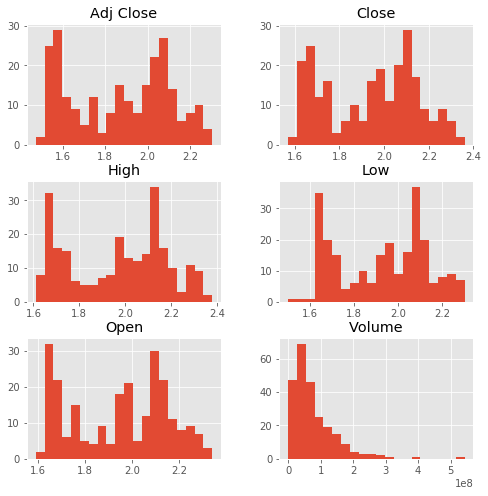

In [5]:
df.hist(bins=20, figsize=[8,8]);

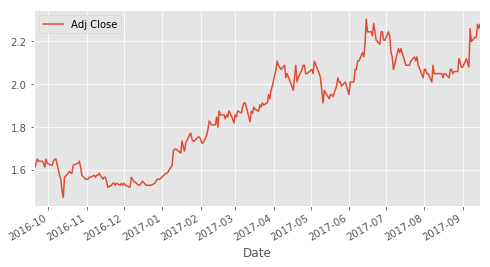

In [6]:
df.plot(y=["Adj Close"],figsize=[8,4]);

In [7]:
#percentage change
df_pct_change=df['Adj Close'].pct_change()

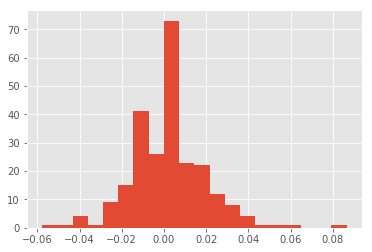

In [8]:
df_pct_change.hist(bins=20);

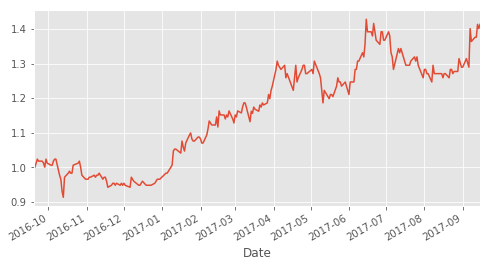

In [9]:
cum_daily_return = (1 + df_pct_change).cumprod()
cum_daily_return.plot(figsize=[8,4]);

## To get all SET symbols
ds.get_symbol_key()
```python
u'SIRI': u'Sansiri Public Company Limited',
u'PTT': u'PTT Public Company Limited',
u'BEC': u'BEC World Public Company Limited',
u'BH': u'Bumrungrad Hospital Public Co Ltd',
```

In [10]:
#sym_list=ds.get_set_list()[:100]

In [11]:
end = datetime(2017, 9, 17)
start = datetime(2015, 9, 17)
sym_list=['SIRI','PTT','BEC','BH', 'ABPIF', 'ACAP', 'AFC', 'AMATA', 'AMC', 'BANPU', 'BKKCP', 'BSBM']
df=ds.get_adj(sym_list,start,end)
df.tail()

,SIRI,PTT,BEC,BH,ABPIF,ACAP,AFC,AMATA,AMC,BANPU,BKKCP,BSBM
Date,,,,,,,,,,,,
2017-09-11,2.22,404.0,18.000000,215.0,8.85,18.200001,8.7,20.100000,3.50,17.200001,10.6,1.47
2017-09-12,2.22,406.0,17.799999,216.0,8.85,17.900000,8.8,20.500000,3.50,17.400000,10.6,1.47
2017-09-13,2.28,404.0,18.000000,211.0,8.90,17.799999,8.8,20.900000,3.46,16.799999,10.7,1.46
2017-09-14,2.26,410.0,17.299999,214.0,8.55,17.500000,8.8,20.799999,3.46,17.100000,10.6,1.44
2017-09-15,2.28,412.0,17.000000,215.0,8.50,17.299999,8.7,21.100000,3.40,17.100000,10.7,1.44


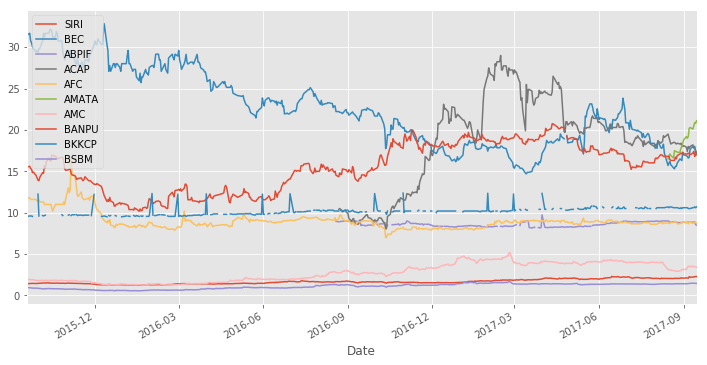

In [12]:
df[['SIRI','BEC', 'ABPIF', 'ACAP', 'AFC', 'AMATA', 'AMC', 'BANPU', 'BKKCP', 'BSBM']].plot(figsize=[12,6])

In [13]:
#percentage change
all_pct_change=df.pct_change()
#all_pct_change.hist(sharex=True, figsize=(10,5), bins=20)

In [14]:
corr=all_pct_change.corr().as_matrix()

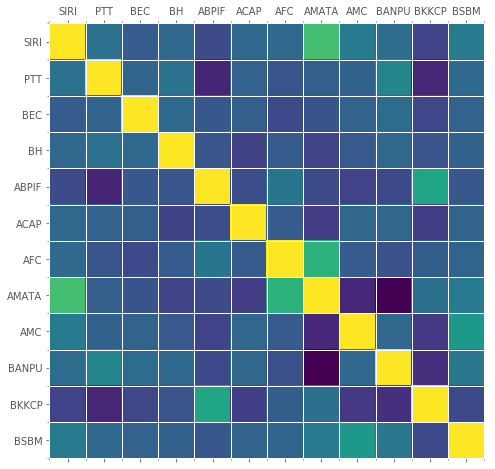

In [15]:
#plt.rcParams['figure.figsize'] = 12,12
fig = plt.figure(figsize=[8,8]);
ax = fig.add_subplot(111);
ax.matshow(corr);
ax.set_xticks(np.arange(len(sym_list)));
ax.set_xticklabels(sym_list);
ax.set_yticks(np.arange(len(sym_list)));
ax.set_yticklabels(sym_list);

ax.set_xticks(np.arange(-.5, len(sym_list), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(sym_list), 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=1);
ax.grid(which='major', color='w', linestyle='-', linewidth=0);

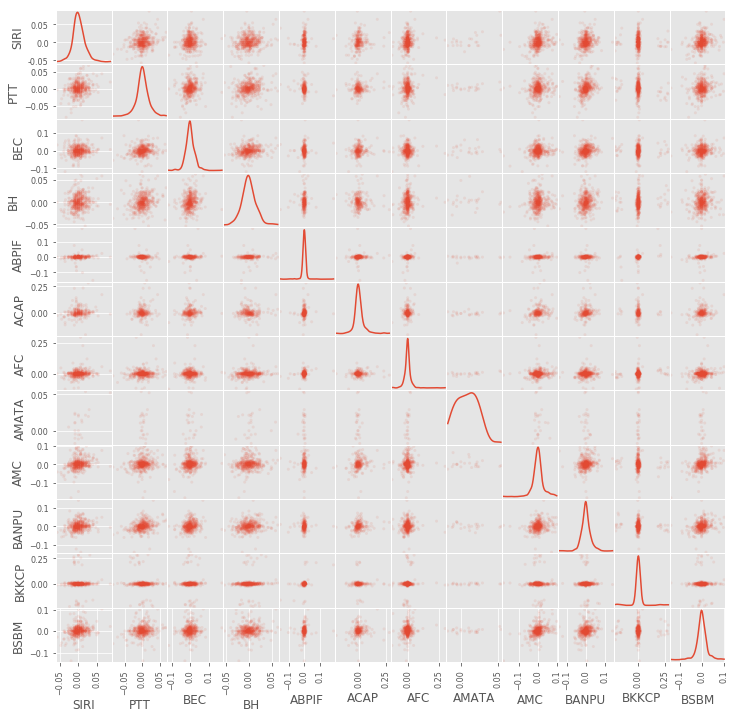

In [16]:
pd.plotting.scatter_matrix(all_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12));

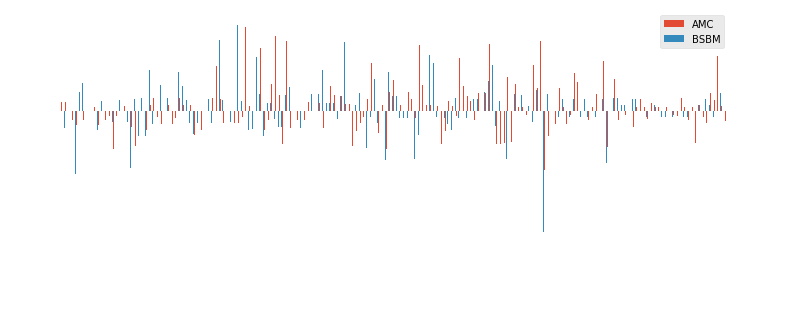

In [17]:
all_pct_change[['AMC','BSBM']].plot(kind='bar',figsize=[12,5],xticks=[]);
plt.axis('off');

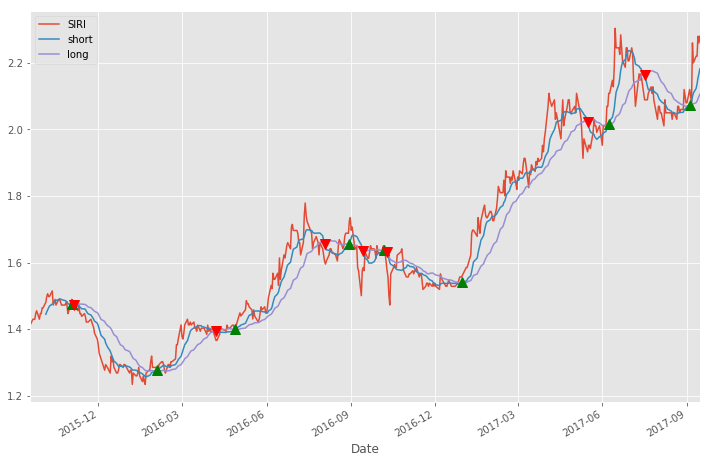

In [18]:
sym="SIRI"
short_window=12
long_window=31
signals=df[[sym]].copy()
signals['short']= signals[sym].rolling(window=short_window).mean()
signals['long']= signals[sym].rolling(window=long_window).mean()

# create signal
signals['signal'] = 0.0
signals['signal'][short_window:] = np.where(signals['short'][short_window:] 
                                            > signals['long'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

ax=signals[[sym,"short","long"]].plot(figsize=[12,8]);
# Plot the buy signals
ax.plot(signals.loc[signals.positions == 1.0].index,
         signals.short[signals.positions == 1.0],
         '^', markersize=10, color='g')
# Plot the sell signals
ax.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short[signals.positions == -1.0],
         'v', markersize=10, color='r')

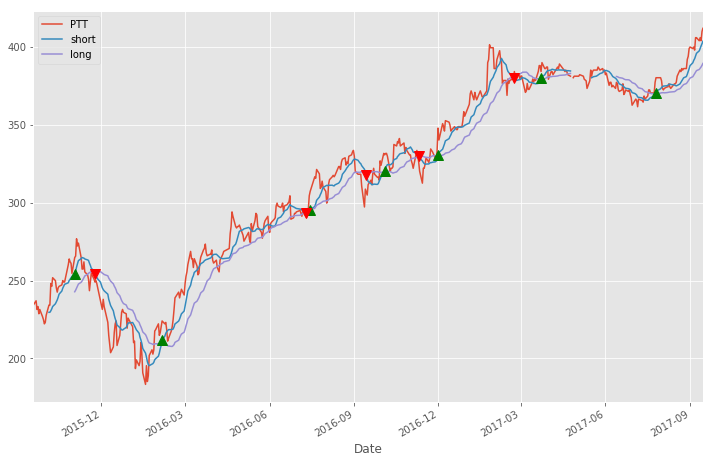

In [19]:
sym="PTT"
short_window=12
long_window=31
signals=df[[sym]].copy()
signals['short']= signals[sym].rolling(window=short_window).mean()
signals['long']= signals[sym].rolling(window=long_window).mean()

# create signal
signals['signal'] = 0.0
signals['signal'][short_window:] = np.where(signals['short'][short_window:] > signals['long'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

ax=signals[[sym,"short","long"]].plot(figsize=[12,8]);
# Plot the buy signals
ax.plot(signals.loc[signals.positions == 1.0].index,
         signals.short[signals.positions == 1.0],
         '^', markersize=10, color='g');
# Plot the sell signals
ax.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short[signals.positions == -1.0],
         'v', markersize=10, color='r');

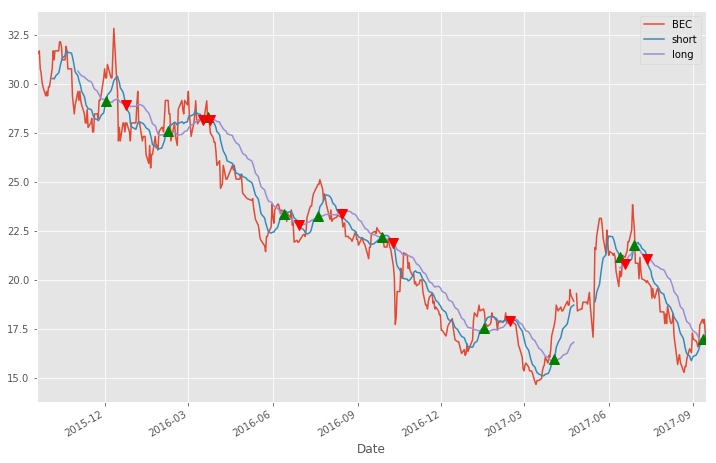

In [20]:
sym="BEC"
short_window=12
long_window=31
signals=df[[sym]].copy()
signals['short']= signals[sym].rolling(window=short_window).mean()
signals['long']= signals[sym].rolling(window=long_window).mean()

# create signal
signals['signal'] = 0.0
signals['signal'][short_window:] = np.where(signals['short'][short_window:] > signals['long'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

ax=signals[[sym,"short","long"]].plot(figsize=[12,8]);
# Plot the buy signals
ax.plot(signals.loc[signals.positions == 1.0].index,
         signals.short[signals.positions == 1.0],
         '^', markersize=10, color='g');
# Plot the sell signals
ax.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short[signals.positions == -1.0],
         'v', markersize=10, color='r');